In [61]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("brsdincer/alzheimer-features")

print("Path to dataset files:", path)

df = pd.read_csv(f"{path}/alzheimer.csv")
df.head()

Path to dataset files: C:\Users\rkaya\.cache\kagglehub\datasets\brsdincer\alzheimer-features\versions\1


,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [62]:
# Assuming df is your loaded DataFrame
print("\n=== Basic Dataset Statistics ===")
print(f"Total records: {len(df)}")
print(f"Columns: {df.columns.tolist()}")

print("\nMissing values per column:")
print(df.isnull().sum())

print("\n=== Demographic Analysis ===")
# Convert to percentage and handle missing groups
group_dist = df['Group'].value_counts(normalize=True).mul(100).round(1)
print("Data Distribution:")
print(group_dist.to_string())

# Gender analysis
group_dist = df['M/F'].value_counts(normalize=True).mul(100).round(1)
print(group_dist.to_string())

print("\nAge Statistics:")
print(f"Mean age: {df['Age'].mean():.1f} years")
print(f"Age range: {df['Age'].min()}-{df['Age'].max()} years")
print(f"Standard deviation: {df['Age'].std():.1f} years")


=== Basic Dataset Statistics ===
Total records: 373
Columns: ['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

Missing values per column:
Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

=== Demographic Analysis ===
Data Distribution:
Group
Nondemented    50.9
Demented       39.1
Converted       9.9
M/F
F    57.1
M    42.9

Age Statistics:
Mean age: 77.0 years
Age range: 60-98 years
Standard deviation: 7.6 years


In [63]:
# Data Cleaning
print("\n=== Data Cleaning ===")
# Fill missing values in 'MMSE' with the mean of the column
mean_ses = df['SES'].mean()
df['SES'].fillna(mean_ses, inplace=True)

mean_mmse = df['MMSE'].mean()
df['MMSE'].fillna(mean_mmse, inplace=True)

print("\nMissing values per column:")
print(df.isnull().sum())


=== Data Cleaning ===

Missing values per column:
Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64


C:\Users\rkaya\AppData\Local\Temp\ipykernel_24900\780866838.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SES'].fillna(mean_ses, inplace=True)
C:\Users\rkaya\AppData\Local\Temp\ipykernel_24900\780866838.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [64]:
# Converting categorical variables to 'category' dtype for better memory usage
print("\n=== Data Type Conversion ===")
# Convert 'Group' and 'M/F' to categorical types
df['Group'] = df['Group'].astype('category').cat.codes
df['M/F'] = df['M/F'].astype('category').cat.codes
df.head()


=== Data Type Conversion ===


,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,87,14,2.000000,27.0,0.0,1987,0.696,0.883
1,2,1,88,14,2.000000,30.0,0.0,2004,0.681,0.876
2,1,1,75,12,2.460452,23.0,0.5,1678,0.736,1.046
3,1,1,76,12,2.460452,28.0,0.5,1738,0.713,1.010
4,1,1,80,12,2.460452,22.0,0.5,1698,0.701,1.034


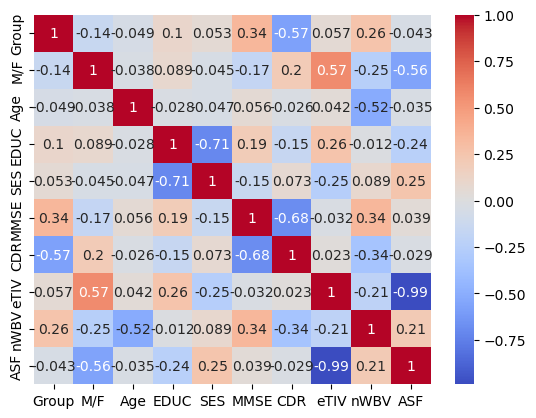

In [65]:
corr_matrix = df.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [66]:
## Feature subset selection

# Train and test data
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

X_train, y_train = train_df.drop(columns=['Group']), train_df['Group']
X_test, y_test = test_df.drop(columns=['Group']), test_df['Group']

In [67]:
# Training
from itertools import combinations
from sklearn.linear_model import LinearRegression

best_two_predictor_model = ''
total_model_count = 0
highest_r_squared = 0
for predictor1, predictor2, predictor3, predictor4 in combinations(X_train.columns, 4):
    X = X_train[[predictor1, predictor2, predictor3, predictor4]].values
    linear_model = LinearRegression()
    linear_model.fit(X, y_train)
    total_model_count+=1

    r_squared = linear_model.score(X, y_train) 

    if r_squared>highest_r_squared:
        highest_r_squared=r_squared
        best_two_predictor_model = f'{predictor1}, {predictor2}, {predictor3} & {predictor4}'
    
best_two_predictor_model

'M/F, SES, CDR & eTIV'

In [68]:
# Testing
import numpy as np
from sklearn.metrics import r2_score

predictions = linear_model.predict(X_test[[predictor1, predictor2, predictor3, predictor4]].values)
test_r2 = r2_score(y_test, predictions)
mae = np.mean(np.abs(y_test - predictions))
accuracy = test_r2 * 100

print(f"Test R^2: {test_r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Accuracy: {1-mae:.4f}")

Test R^2: 0.1202
Mean Absolute Error (MAE): 0.4484
Accuracy: 0.5516


In [69]:
## Random Forest Model
# Training
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Random Forest (often works well for medical data)
rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# XGBoost with clinical parameter tuning
xgb = XGBClassifier(
    learning_rate=0.01,
    n_estimators=500,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    use_label_encoder=False
)
xgb.fit(X_train, y_train)

c:\Users\rkaya\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:54:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [70]:
# Testing
import numpy as np
from sklearn.metrics import r2_score

predictions = xgb.predict(X_test.values)
test_r2 = r2_score(y_test, predictions)
mae = np.mean(np.abs(y_test - predictions))
accuracy = test_r2 * 100

print(f"Test R^2: {test_r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Accuracy: {1-mae:.4f}")

Test R^2: 0.1379
Mean Absolute Error (MAE): 0.2400
Accuracy: 0.7600
